In [3]:
# original: https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/rugby_analytics.html

In [71]:
!date

import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
%matplotlib inline
import pymc3 as pm, theano.tensor as tt
import arviz as az
import matplotlib.pyplot as plt

Tue Oct 12 10:30:55 CDT 2021


In [55]:
def pdetails(var):
    keys = var.__dict__.keys()
    values = var.__dict__.values()
    for key, value in zip(keys, values):
        print(key)
        print(value)
        print("-----")
#away_points.__dict__.values()
#pdetails(away_points)

In [4]:
data_csv = StringIO("""home_team,away_team,home_score,away_score
Wales,Italy,23,15
France,England,26,24
Ireland,Scotland,28,6
Ireland,Wales,26,3
Scotland,England,0,20
France,Italy,30,10
Wales,France,27,6
Italy,Scotland,20,21
England,Ireland,13,10
Ireland,Italy,46,7
Scotland,France,17,19
England,Wales,29,18
Italy,England,11,52
Wales,Scotland,51,3
France,Ireland,20,22""")

In [5]:
df = pd.read_csv(data_csv)

teams = df.home_team.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index

df = pd.merge(df, teams, left_on='home_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='away_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)

observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values

home_team = df.i_home.values
away_team = df.i_away.values

num_teams = len(df.i_home.drop_duplicates())
num_games = len(home_team)

g = df.groupby('i_away')
att_starting_points = np.log(g.away_score.mean())
g = df.groupby('i_home')
def_starting_points = -np.log(g.away_score.mean())

In [6]:
df

,home_team,away_team,home_score,away_score,i_home,i_away
0,Wales,Italy,23,15,0,4
1,France,England,26,24,1,5
2,Ireland,Scotland,28,6,2,3
3,Ireland,Wales,26,3,2,0
4,Scotland,England,0,20,3,5
5,France,Italy,30,10,1,4
6,Wales,France,27,6,0,1
7,Italy,Scotland,20,21,4,3
8,England,Ireland,13,10,5,2
9,Ireland,Italy,46,7,2,4


In [7]:
model = pm.Model()
with pm.Model() as model:
    # global model parameters
    home = pm.Flat('home')
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept')

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_teams)

    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=observed_away_goals)

In [56]:
pdetails(model)

_parent
None
-----
_theano_config
{'compute_test_value': 'raise'}
-----
_old_theano_config
{'compute_test_value': 'raise'}
-----
name

-----
coords
{}
-----
RV_dims
{}
-----
named_vars
{'home': home, 'sd_att_log__': sd_att_log__, 'sd_att': sd_att, 'sd_def_log__': sd_def_log__, 'sd_def': sd_def, 'intercept': intercept, 'atts_star': atts_star, 'defs_star': defs_star, 'atts': atts, 'defs': defs, 'home_points': home_points, 'away_points': away_points}
-----
free_RVs
[home, sd_att_log__, sd_def_log__, intercept, atts_star, defs_star]
-----
observed_RVs
[home_points, away_points]
-----
deterministics
[sd_att, sd_def, atts, defs]
-----
potentials
[]
-----
missing_values
[]
-----
home
home
-----
sd_att_log__
sd_att_log__
-----
sd_att
sd_att
-----
sd_def_log__
sd_def_log__
-----
sd_def
sd_def
-----
intercept
intercept
-----
atts_star
atts_star
-----
defs_star
defs_star
-----
atts
atts
-----
defs
defs
-----
home_points
home_points
-----
away_points
away_points
-----
_cache
defaultdict(<class 'di

In [14]:
away_points

away_points

In [22]:
pdetails(home_theta)

tag
scratchpad{'trace': [[('/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py', 536, 'run_cell', 'return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)'), ('/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py', 2858, 'run_cell', 'raw_cell, store_history, silent, shell_futures)'), ('/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py', 2886, '_run_cell', 'return runner(coro)'), ('/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py', 68, '_pseudo_sync_runner', 'coro.send(None)'), ('/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py', 3063, 'run_cell_async', 'interactivity=interactivity, compiler=compiler, result=result)'), ('/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py', 3254, 'run_ast_nodes', 'if (await self.run_code(code, result,  async_=asy)

In [23]:
pdetails(atts_star)

tag
scratchpad{'test_value': array([0., 0., 0., 0., 0., 0.])}
-----
type
TensorType(float64, vector)
-----
owner
None
-----
index
None
-----
name
atts_star
-----
auto_name
auto_15663
-----
dshape
(6,)
-----
dsize
6
-----
distribution
-----
logp_elemwiset
Elemwise{switch,no_inplace}.0
-----
logp_sum_unscaledt
Sum{acc_dtype=float64}.0
-----
logp_nojac_unscaledt
Elemwise{switch,no_inplace}.0
-----
total_size
None
-----
model
-----
scaling
TensorConstant{1.0}
-----
random
-----


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, home]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


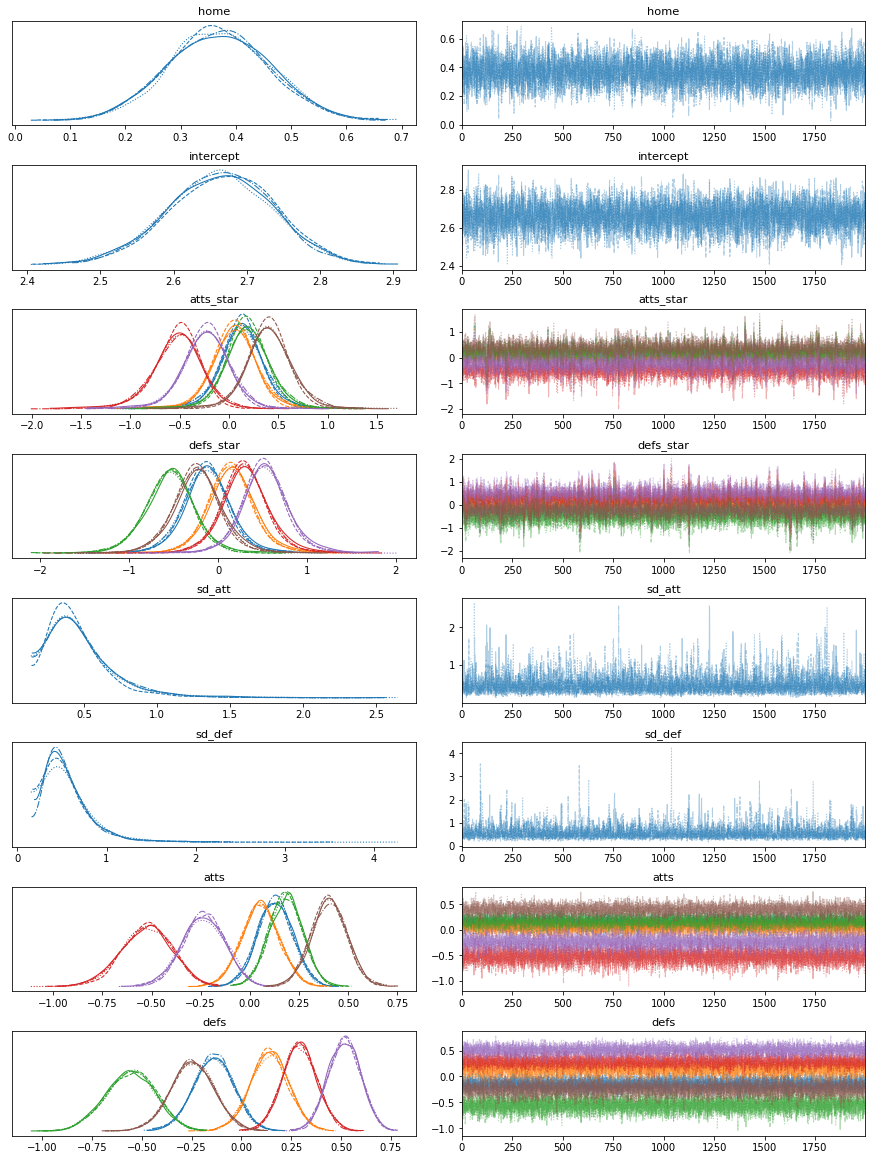

In [24]:
with model:
    trace = pm.sample(2000)
    pm.traceplot(trace)

In [49]:
trace['sd_def']

array([0.63188899, 0.33217124, 0.33572744, ..., 0.32626638, 0.41248353,
       0.41248353])

array([<AxesSubplot:title={'center':'x'}>], dtype=object)

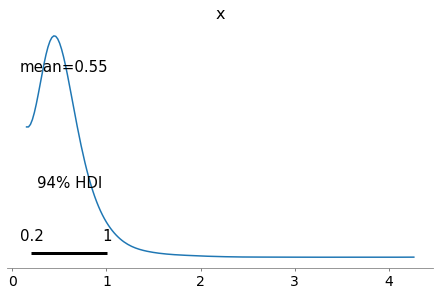

In [52]:
az.plot_posterior(trace['sd_def'])


In [65]:
for var in model.named_vars:
    print(var)
    print(trace[var])

home
[0.46867441 0.44971    0.4650986  ... 0.2595217  0.5138684  0.5138684 ]
sd_att_log__
[-1.26531195 -0.58847948 -1.20927265 ... -1.15530351 -0.87386231
 -0.87386231]
sd_att
[0.28215127 0.55517079 0.29841425 ... 0.31496193 0.41733655 0.41733655]
sd_def_log__
[-0.45904155 -1.10210465 -1.09145562 ... -1.1200411  -0.88555899
 -0.88555899]
sd_def
[0.63188899 0.33217124 0.33572744 ... 0.32626638 0.41248353 0.41248353]
intercept
[2.58619228 2.64910757 2.60327757 ... 2.78400936 2.52038108 2.52038108]
atts_star
[[ 0.1368532   0.06125638  0.09632818 -0.74321637 -0.2285862   0.29755423]
 [ 0.09285155 -0.01112341  0.17181223 -0.51190294 -0.2492036   0.33050453]
 [ 0.0695784  -0.14584788  0.06523149 -0.86612715 -0.47686975  0.19313271]
 ...
 [ 0.34092613  0.30556851  0.42013876 -0.35165073 -0.02065269  0.51866096]
 [-0.08560915 -0.26688443 -0.05347806 -0.93672308 -0.34386633  0.32425917]
 [-0.08560915 -0.26688443 -0.05347806 -0.93672308 -0.34386633  0.32425917]]
defs_star
[[ 0.06664753  0.262621

KeyError: 'Unknown variable home_points'

/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'home'}>,
       <AxesSubplot:title={'center':'intercept'}>,
       <AxesSubplot:title={'center':'atts_star\n0'}>,
       <AxesSubplot:title={'center':'atts_star\n1'}>,
       <AxesSubplot:title={'center':'atts_star\n2'}>,
       <AxesSubplot:title={'center':'atts_star\n3'}>,
       <AxesSubplot:title={'center':'atts_star\n4'}>,
       <AxesSubplot:title={'center':'atts_star\n5'}>,
       <AxesSubplot:title={'center':'defs_star\n0'}>,
       <AxesSubplot:title={'center':'defs_star\n1'}>,
       <AxesSubplot:title={'center':'defs_star\n2'}>,
       <AxesSubplot:title={'center':'defs_star\n3'}>,
       <AxesSubplot:title={'center':'defs_star\n4'}>,
       <AxesSubplot:title={'center':'defs_star\n5'}>,
       <AxesSubplot:title={'center':'sd_att'}>,
       <AxesSubplot:title={'center':'sd_def'}>,
       <AxesSubplot:title={'center':'atts\n0'}>,
       <AxesSubplot:title={'center':'atts\n1'}>,
       <AxesSubplot:title={'center':'atts\n2'}>,
       <Axes

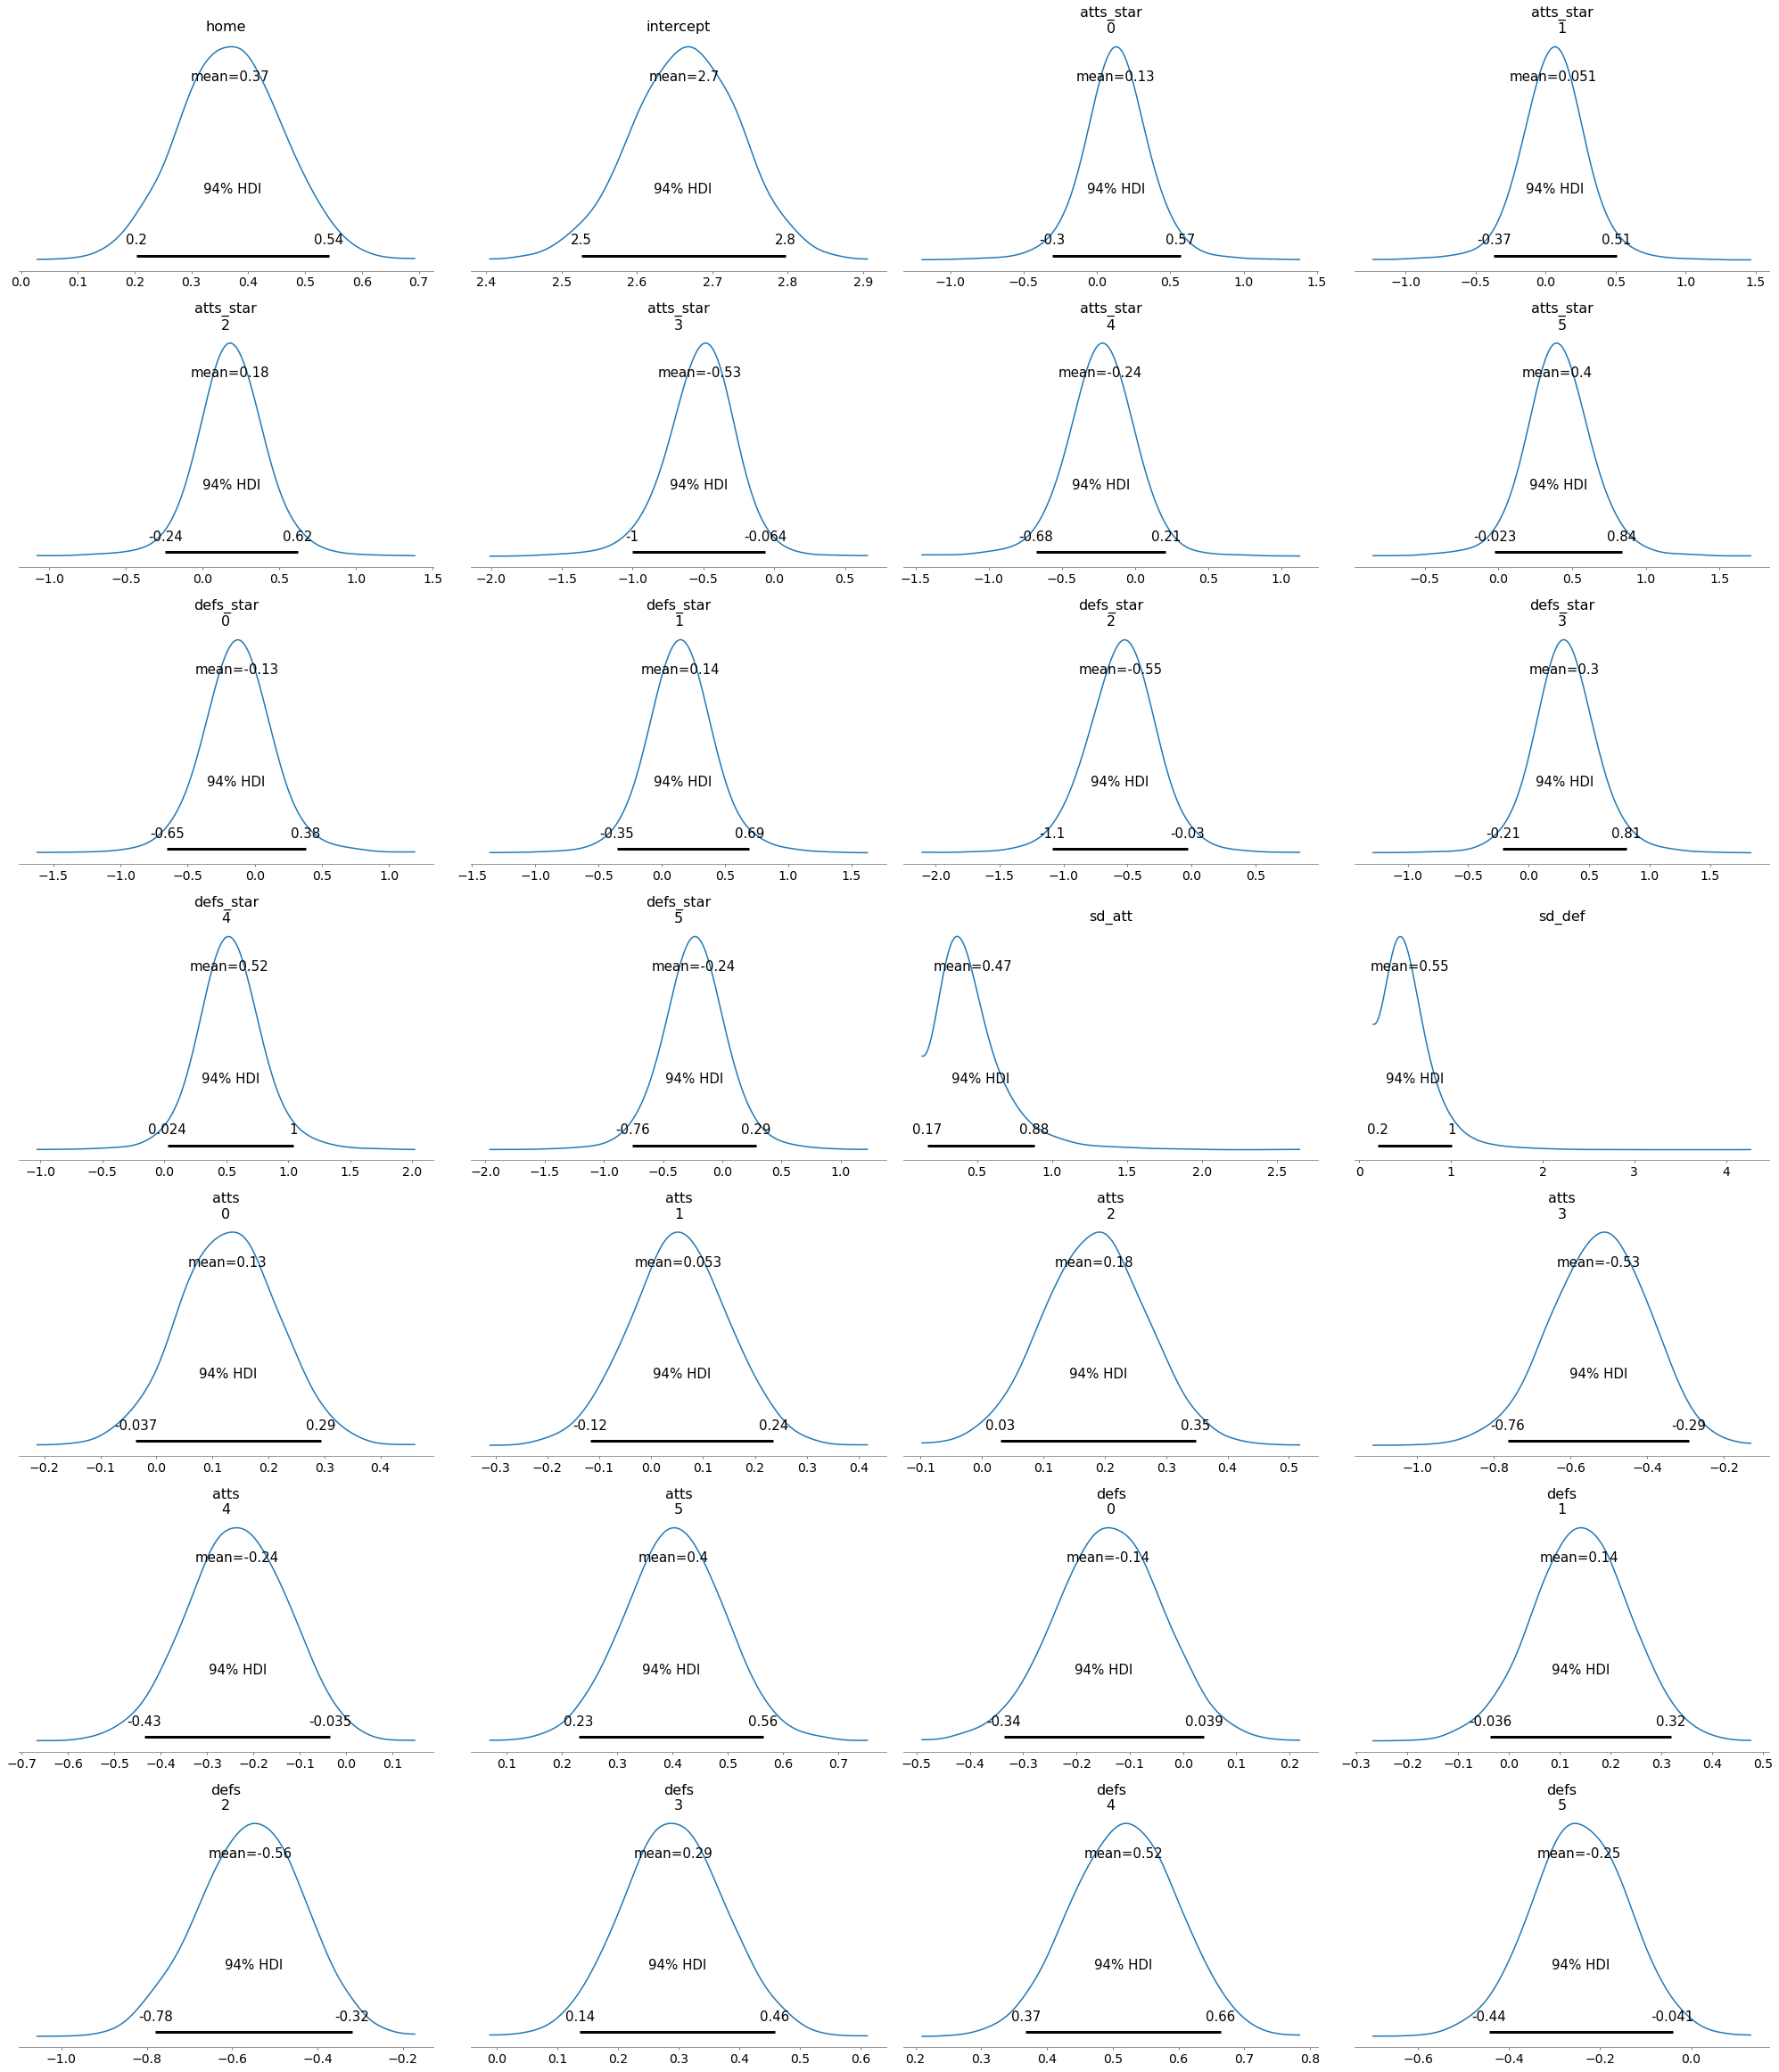

In [64]:
az.plot_posterior(trace)

In [66]:
# this is a good reference!
# https://arviz-devs.github.io/arviz/getting_started/Introduction.html

In [68]:
help(pm.forestplot)

Help on function plot_forest in module arviz.plots.forestplot:

plot_forest(data, kind='forestplot', model_names=None, var_names=None, filter_vars=None, transform=None, coords=None, combined=False, hdi_prob=None, rope=None, quartiles=True, ess=False, r_hat=False, colors='cycle', textsize=None, linewidth=None, markersize=None, ridgeplot_alpha=None, ridgeplot_overlap=2, ridgeplot_kind='auto', ridgeplot_quantiles=None, figsize=None, ax=None, backend=None, backend_config=None, backend_kwargs=None, show=None, credible_interval=None)
    Forest plot to compare HDI intervals from a number of distributions.
    
    Generates a forest plot of 100*(hdi_prob)% HDI intervals from
    a trace or list of traces.
    
    Parameters
    ----------
    data: obj or list[obj]
        Any object that can be converted to an az.InferenceData object
        Refer to documentation of az.convert_to_dataset for details
    kind: str
        Choose kind of plot for main axis. Supports "forestplot" or "ridgepl

Text(0.5, 1.0, 'Team Offense')

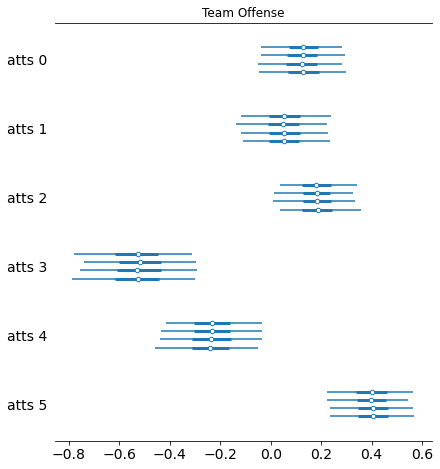

In [78]:
labels = ['France', 'Ireland', 'Scotland', 'Italy', 'England', 'Wales']
pm.forestplot(trace, varnames=['atts'])  #, ylabels=labels, main="Team Offense")
plt.title(label="Team Offense")

/Users/m102417/tools/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Text(0.5, 1.0, 'Team Defense')

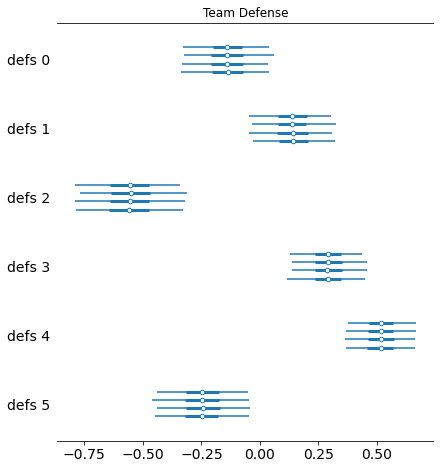

In [83]:
pm.forestplot(trace, varnames=['defs'])#, ylabels=labels, main="Team Defense")
plt.title(label="Team Defense")

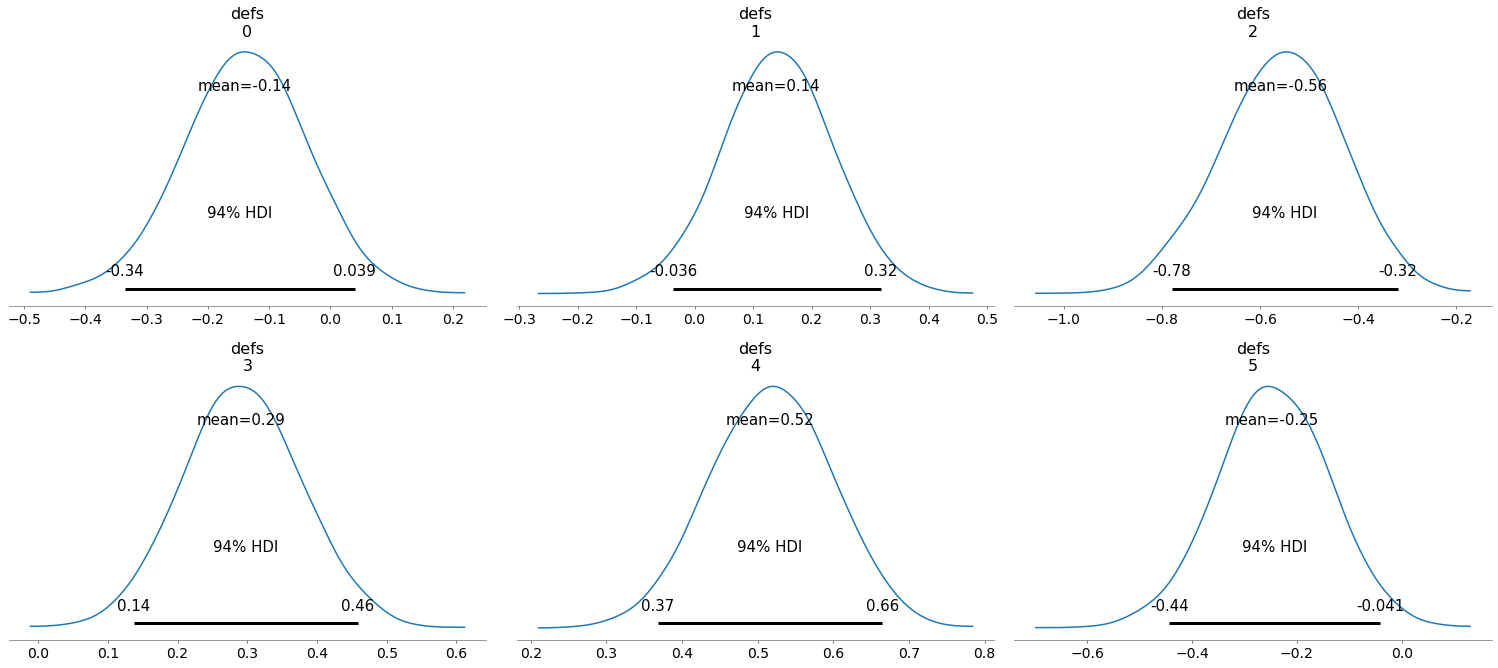

In [81]:
with model:
    _ = pm.plot_posterior(trace, var_names=['defs'])

In [84]:
df_trace = pm.trace_to_dataframe(trace[:1000])

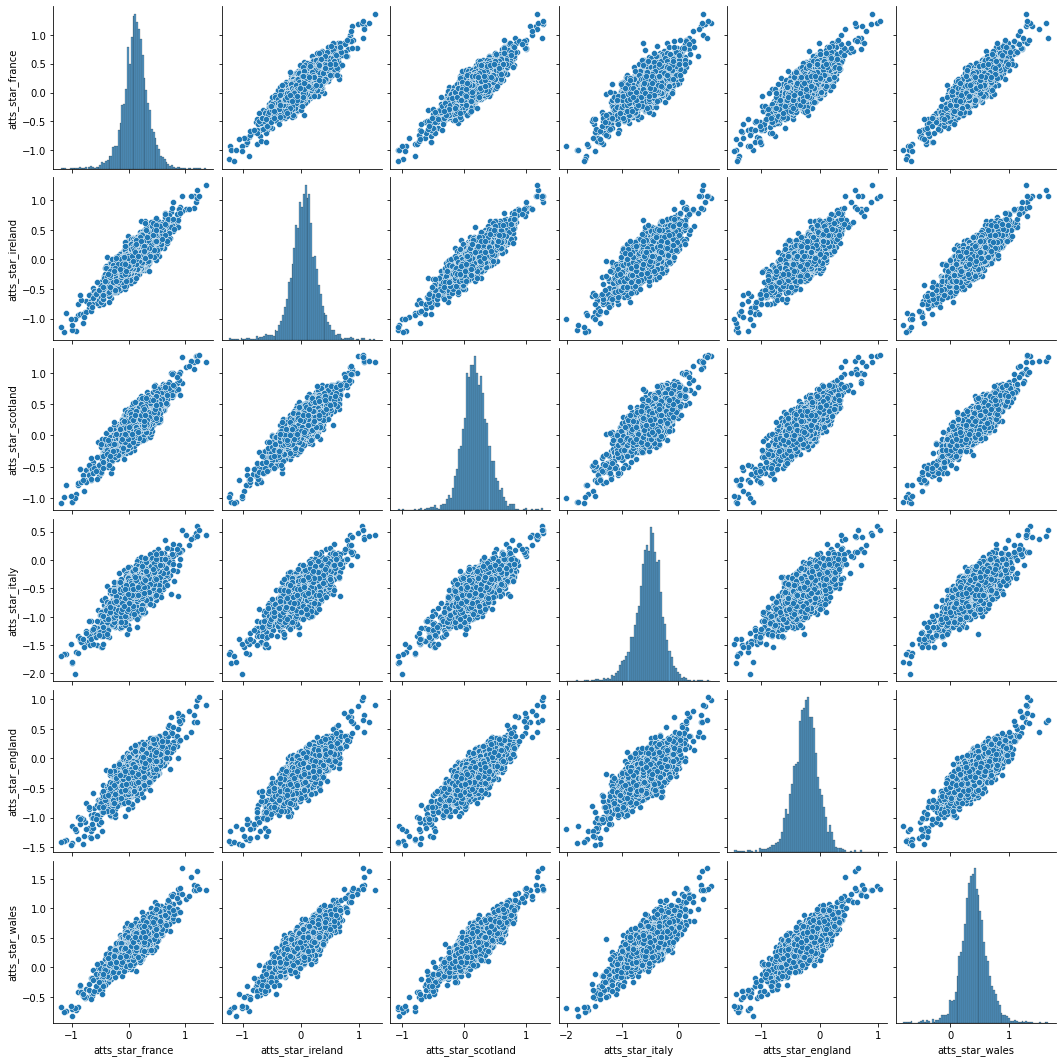

In [85]:

import seaborn as sns

cols = {
    'atts_star__0': 'atts_star_france',
    'atts_star__1': 'atts_star_ireland',
    'atts_star__2': 'atts_star_scotland',
    'atts_star__3': 'atts_star_italy',
    'atts_star__4': 'atts_star_england',
    'atts_star__5': 'atts_star_wales'
}

df_trace_att = df_trace[list(cols)].rename(columns=cols)
_ = sns.pairplot(df_trace_att)